# TASK2 - PREDICTION USING UNSUPERVISED MACHINE LEARNING

# Problem statement: From "Iris" dataset predict the optimal number of clusters and represent it visually.

Author: Sneha Yarazarvimath

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm #this is related to colormap
import seaborn as sns

from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


IRIS FLOWER:

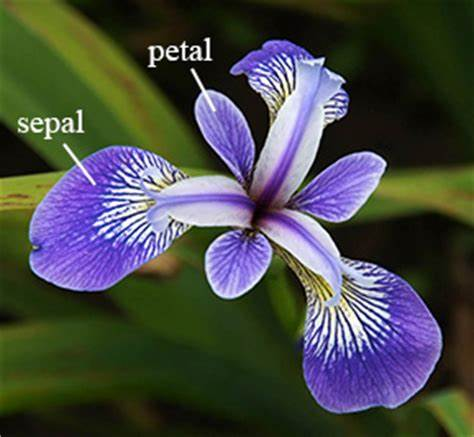

In [3]:
#Checking no of rows and columns in given data
df.shape 

(150, 6)

There are 150 observations and 6 variables including their "id" as one column 

In [4]:
#checking datatypes of variables
df.dtypes 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#Removing insignificant variables
df.drop("Id",axis=1,inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we are left with 5 variables, which helps us to form good clusters.

In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

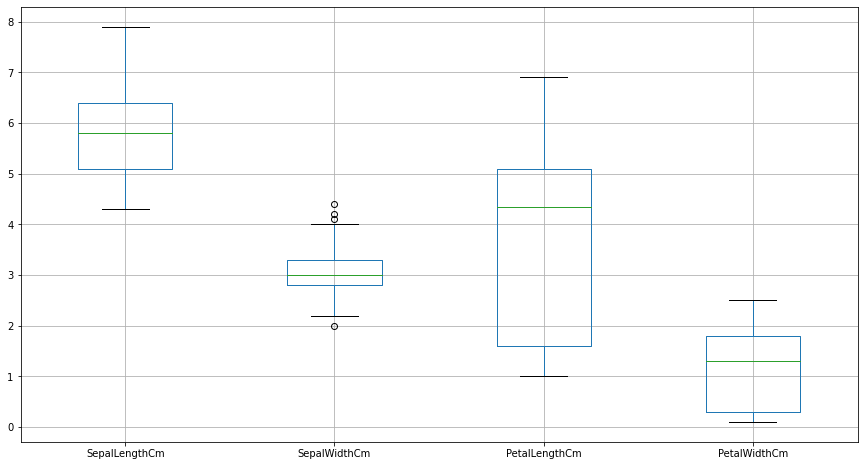

In [8]:
#Checking outliers
plt.rcParams["figure.figsize"]=[15,8]
df.drop(["Species"],axis=1).boxplot()
plt.show()

We can see outliers in sepal width "SepalWidthCm".

In [9]:
#Outlier treatment using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(146, 5)

We can clearly see that four rows are removed and we are left with 146 observations now.

In [10]:
#Checking for missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values

Data transformation:
No need to go for data transformation like scaling,smoothing etcetera because all varaibles are measured in centimeters

# K-Means clustering

# Elbow plot method

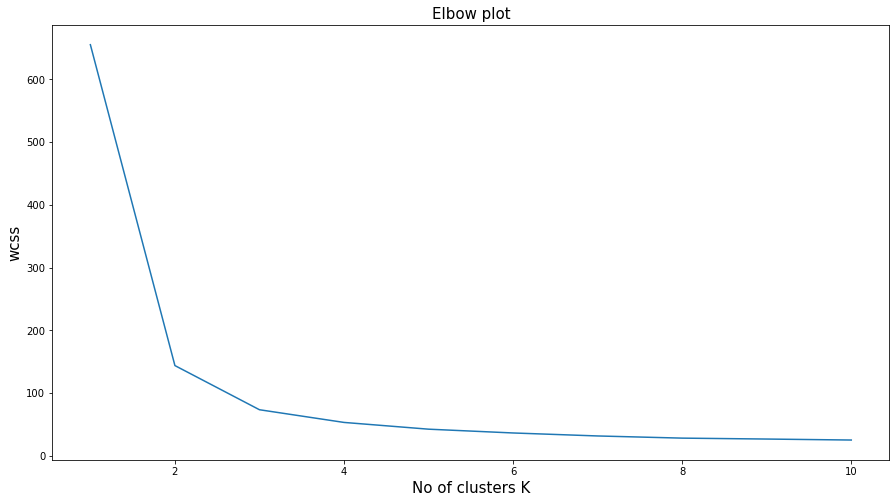

In [11]:
#Let's go for K-Means clustering
#To know the optimal value of K we should plot Elbow plot
#x axis- K value, y-axis- WCSS(Within Cluster Sum of Sqaures)
#Since we have a small dataset, we create several cluster combinations ranging from 1 to 10 only.
X=df.iloc[:, [0, 1, 2, 3]].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#inertia returns wcss for specific value of k

plt.plot(range(1,11), wcss)
plt.title("Elbow plot",fontsize=15)
plt.xlabel("No of clusters K", fontsize=15)
plt.ylabel("wcss",fontsize=15)
plt.show()

We can see that for K=3, there is an elbow in the plot. Before this elbow point, the wcss is decreasing rapidly and after K=3 wcss is decreasing slowly.

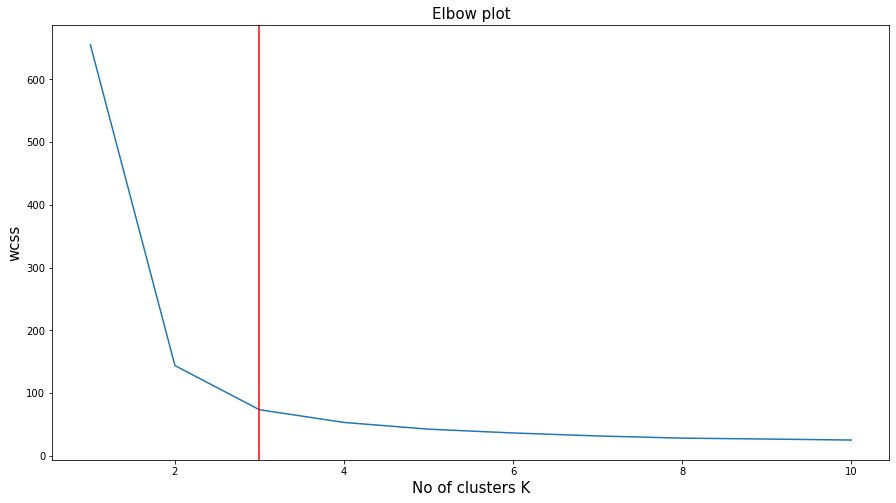

In [12]:
#We can see that over here
plt.plot(range(1,11), wcss)
plt.title("Elbow plot",fontsize=15)
plt.xlabel("No of clusters K", fontsize=15)
plt.ylabel("wcss",fontsize=15)
plt.axvline(x=3, color="red")
plt.show()

We can say that Within cluster sum of squares(wcss) value is good for K=3 to get clusters with less varation within them.

To make sure that, there is less variation within clusters and more between clusters, we should find optimal k value using Silhouette method.

# Silhouette score method

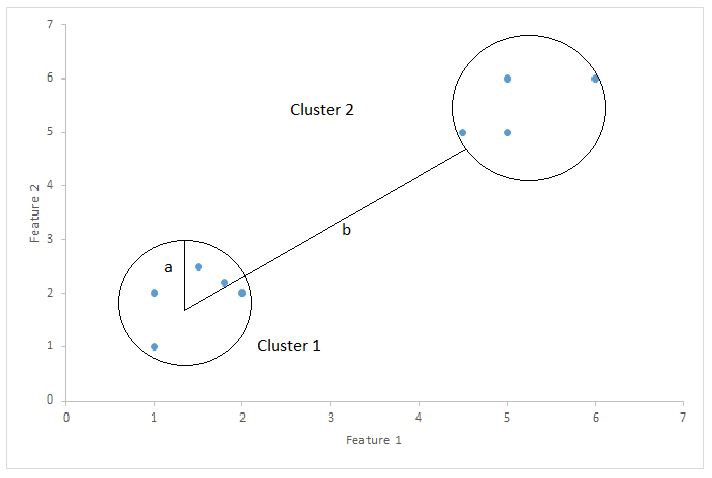

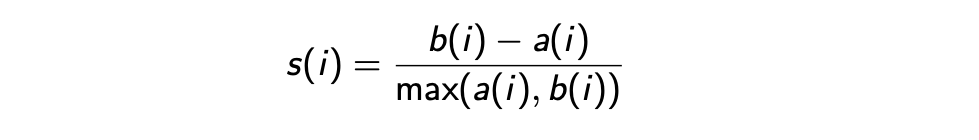

In [13]:
#Create list of different values of K
n_clusters=[2,3,4,5,6]
for K in n_clusters:
    cluster= KMeans(n_clusters=K, random_state=10)
    predict=cluster.fit_predict(X)
    score= silhouette_score(X,predict,random_state=10)
    print("For{} clusters the silhouette score is {})".format(K, score))

For2 clusters the silhouette score is 0.6867535359684322)
For3 clusters the silhouette score is 0.5541488042389832)
For4 clusters the silhouette score is 0.49722525796765404)
For5 clusters the silhouette score is 0.49341621792167145)
For6 clusters the silhouette score is 0.37141716448865125)


Silhouette score is maximum for K=2

According to Silhouette score method, optimal K value is 2

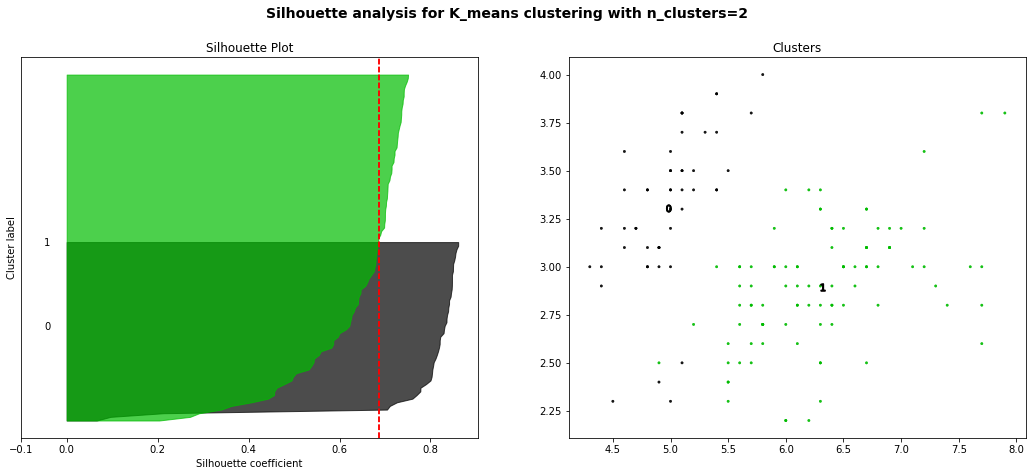

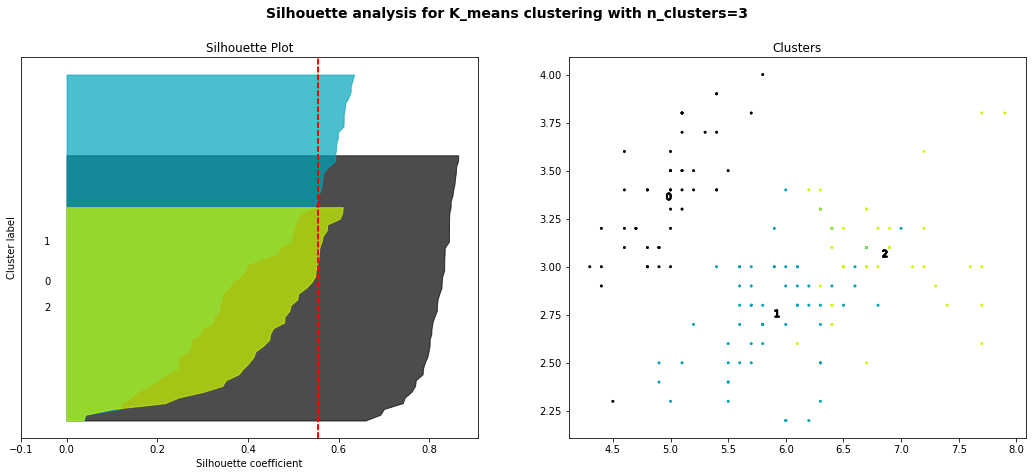

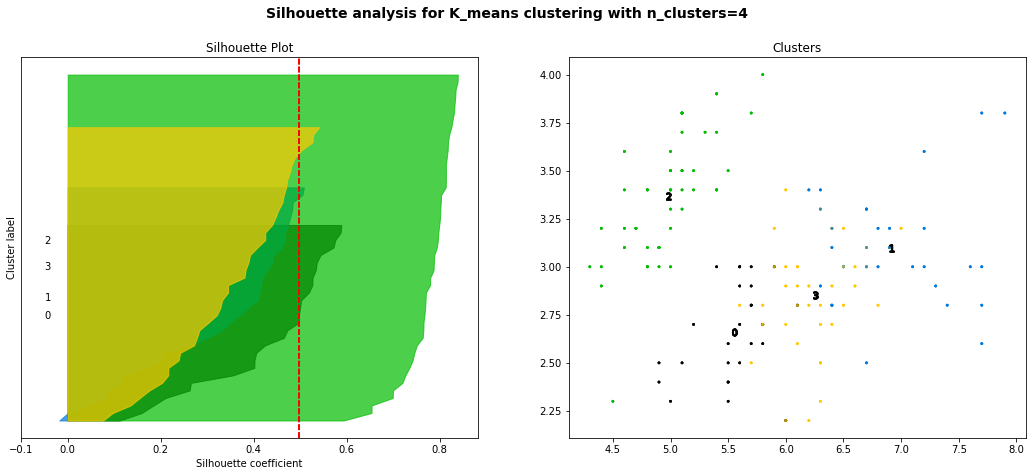

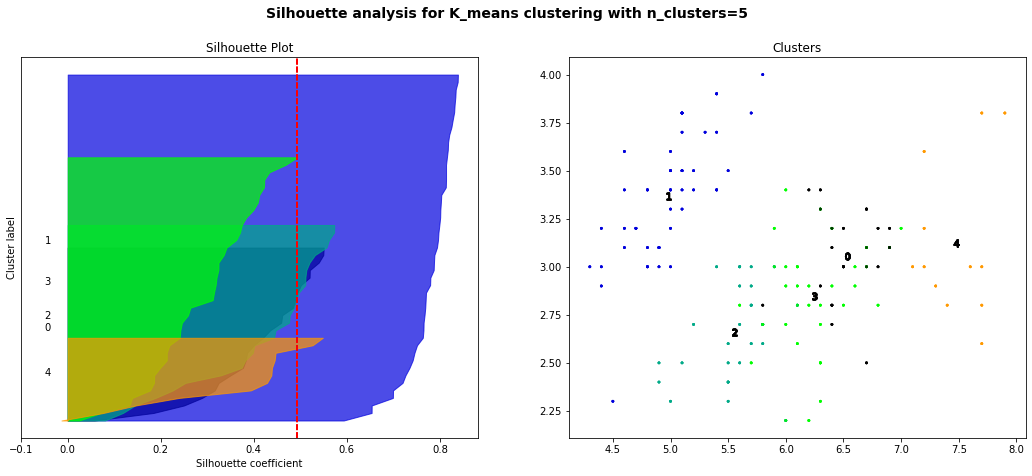

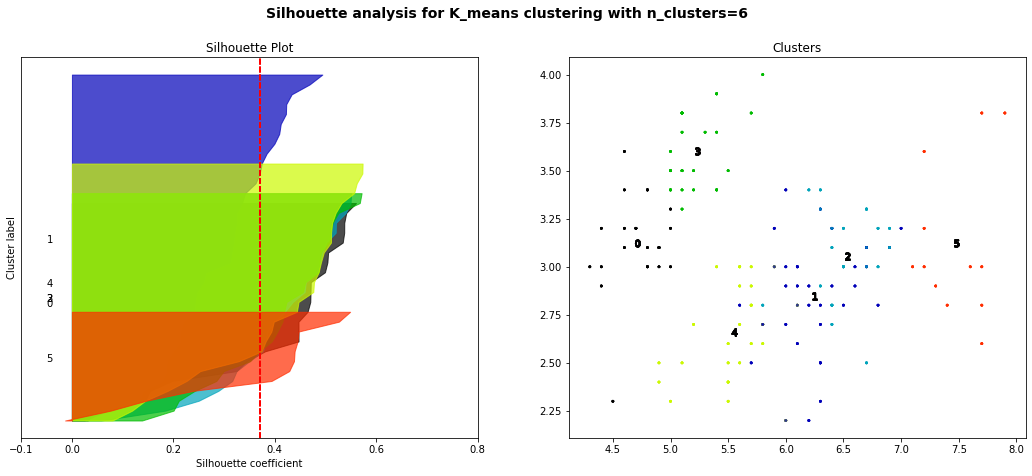

In [14]:
#Let's visualize the silhouette scores
n_clusters=[2,3,4,5,6]

X=np.array(X)

for K in n_clusters:
    fig,(ax1,ax2)= plt.subplots(1,2)
    fig.set_size_inches(18,7)
    model=KMeans(n_clusters=K, random_state=10)
    cluster_labels=model.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    y_lower=10
    for i in range(K):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/K)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        y_lower-y_upper+10
        ax1.set_title("Silhouette Plot")
        ax1.set_xlabel("Silhouette coefficient")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red",linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8])
        colors=cm.nipy_spectral(cluster_labels.astype(float)/K)
        ax2.scatter(X[:,0],X[:,1],marker=".",s=30,lw=0,alpha=0.7,
                   c=colors,edgecolor="k")
        centers=model.cluster_centers_
        for i,c in enumerate(centers):
            ax2.scatter(c[0],c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("Clusters")
        plt.suptitle(("Silhouette analysis for K_means clustering with n_clusters=%d" %K)
                    ,fontsize=14,fontweight="bold")
plt.show()        

Using silhouette score method we got 2 as our optimal K value 